In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%load_ext autoreload
%autoreload 2

from src.energy import load_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
df = load_data()
df

,energy
date,
2019-01-01 00:15:00,65900.149402
2019-01-01 00:30:00,64840.326903
2019-01-01 00:45:00,63789.043352
2019-01-01 01:00:00,63138.277485
2019-01-01 01:15:00,62333.139659
...,...
2021-09-23 23:00:00,65855.815235
2021-09-23 23:15:00,63640.333284
2021-09-23 23:30:00,62380.754306


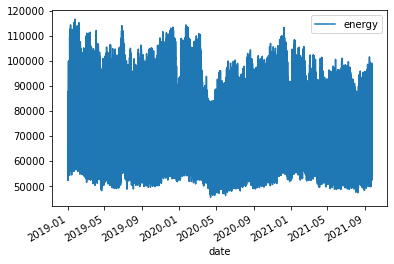

In [5]:
df.plot();

<AxesSubplot:xlabel='date'>

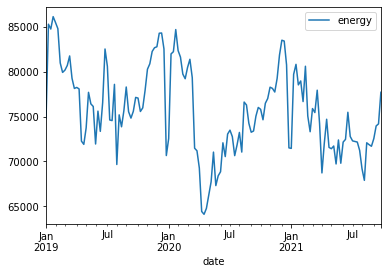

In [96]:
temp = df.groupby(pd.Grouper(freq="h")).sum()
temp = temp[temp>100].dropna()

temp["2020-06-18":"2020-06-30"] = temp["2020-06-18":"2020-06-30"]/2

temp = df.groupby(pd.Grouper(freq="w")).mean()


temp.plot()

<AxesSubplot:>

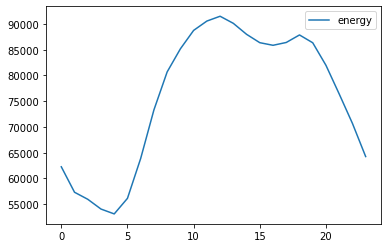

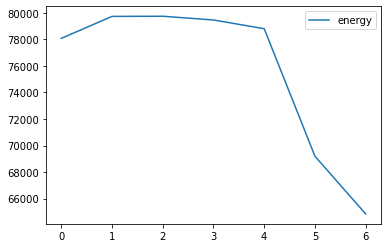

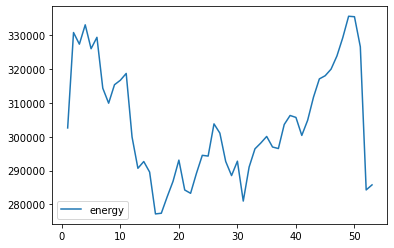

In [116]:
temp = df.groupby(lambda x: x.hour).mean()
temp.plot()
temp = df.groupby(lambda x: x.weekday()).mean()
temp.plot()

temp = df.groupby(pd.Grouper(freq="h")).sum()
temp = temp[temp>100].dropna()

temp["2020-06-18":"2020-06-30"] = temp["2020-06-18":"2020-06-30"]/2

temp = temp.groupby(pd.Grouper(freq="w")).mean()
temp = temp.groupby(lambda x: x.isocalendar()[1]).mean()
temp.plot()